In [1]:
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)
client

/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35935 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:35935/status,
Dashboard: http://127.0.0.1:35935/status,Workers: 12
Total threads: 96,Total memory: 0.98 TiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38027,Workers: 12
Dashboard: http://127.0.0.1:35935/status,Total threads: 96
Started: Just now,Total memory: 0.98 TiB
Comm: tcp://127.0.0.1:34955,Total threads: 8
Dashboard: http://127.0.0.1:43153/status,Memory: 83.91 GiB
Nanny: tcp://127.0.0.1:40729,


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
import cmocean.cm as cmo

%matplotlib inline

data_dir = '/data/SO3/edavenport/tpose6/sep2012/run_iter0/'
grid_dir = '/data/SO6/TPOSE_diags/tpose6/grid_6/'

num_diags = 122 #
itPerFile = 72 # 1 day
intervals = range(itPerFile,itPerFile*num_diags+1,itPerFile)

prefix = ['diag_state']
ds = open_mdsdataset(data_dir=data_dir,grid_dir=grid_dir,iters=intervals,prefix=prefix)
ds['time'] = range(len(ds.time))

In [3]:
from matplotlib.colors import TwoSlopeNorm
plt.rcParams['font.size'] = 16

lonMin = 170.0
lonMax = 260.0
latMin = -0.1
latMax = 0.1

lats = ds.YC.values
lons = ds.XC.values
depths = ds.Z.values

latli = np.argmin(np.abs(lats - latMin))
latui = np.argmin(np.abs(lats - latMax)) + 1
lonli = np.argmin(np.abs(lons - lonMin))
lonui = np.argmin(np.abs(lons - lonMax)) + 1

In [14]:
zMin = -1000.0
depthui = np.argmin(np.abs(depths - zMin)) + 1
u_var = (ds.UVEL[:,:depthui, latli:latui, lonli:lonui]).var(dim='time')
v_var = (ds.VVEL[:,:depthui, latli:latui, lonli:lonui]).var(dim='time')
u_var_transect = u_var.mean(dim='YC').compute()
v_var_transect = v_var.mean(dim='YG').compute()

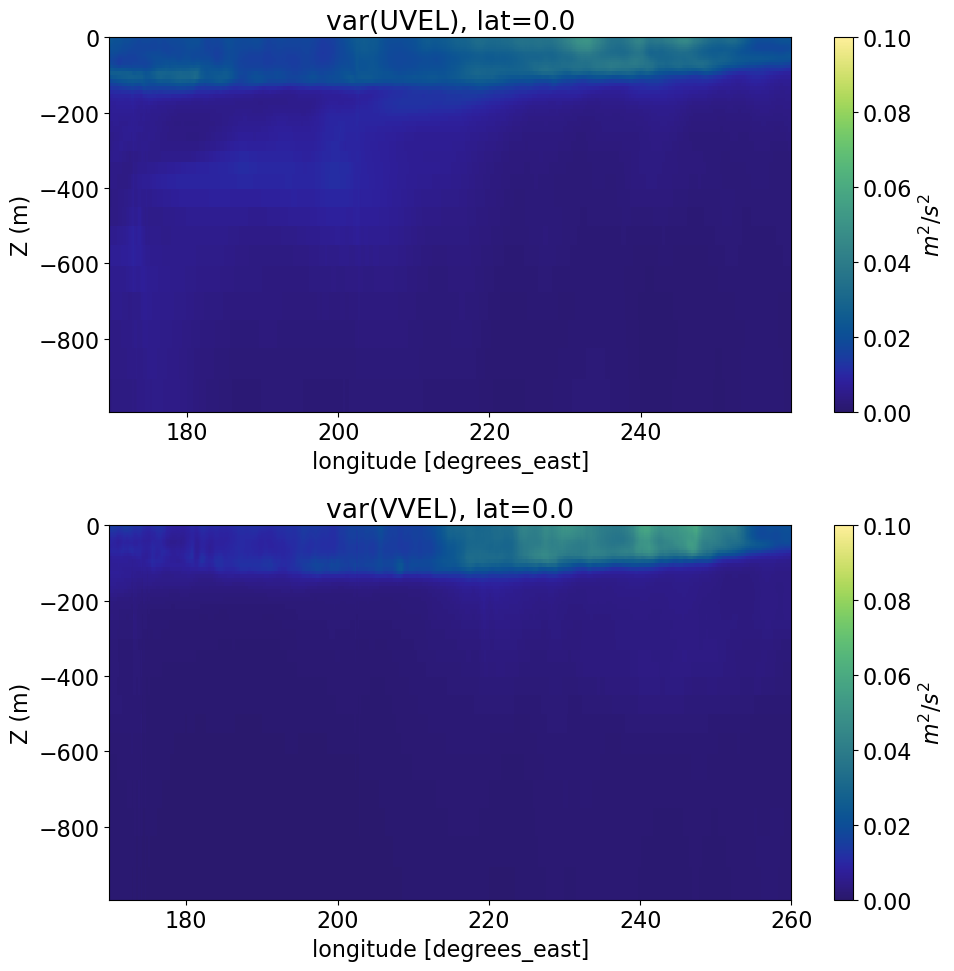

In [16]:
fig, ax = plt.subplots(figsize=(10,10),nrows=2)
u_var_transect.plot(ax=ax[0], cmap=cmo.haline, vmin=0.0, vmax=0.1, cbar_kwargs={'label': '$m^2/s^2$'})
ax[0].set_title('var(UVEL), lat=0.0')
ax[0].set_ylabel('Z (m)')
v_var_transect.plot(ax=ax[1], cmap=cmo.haline, vmin=0.0, vmax=0.1, cbar_kwargs={'label': '$m^2/s^2$'})
ax[1].set_title('var(VVEL), lat=0.0')
ax[1].set_ylabel('Z (m)')
plt.tight_layout()

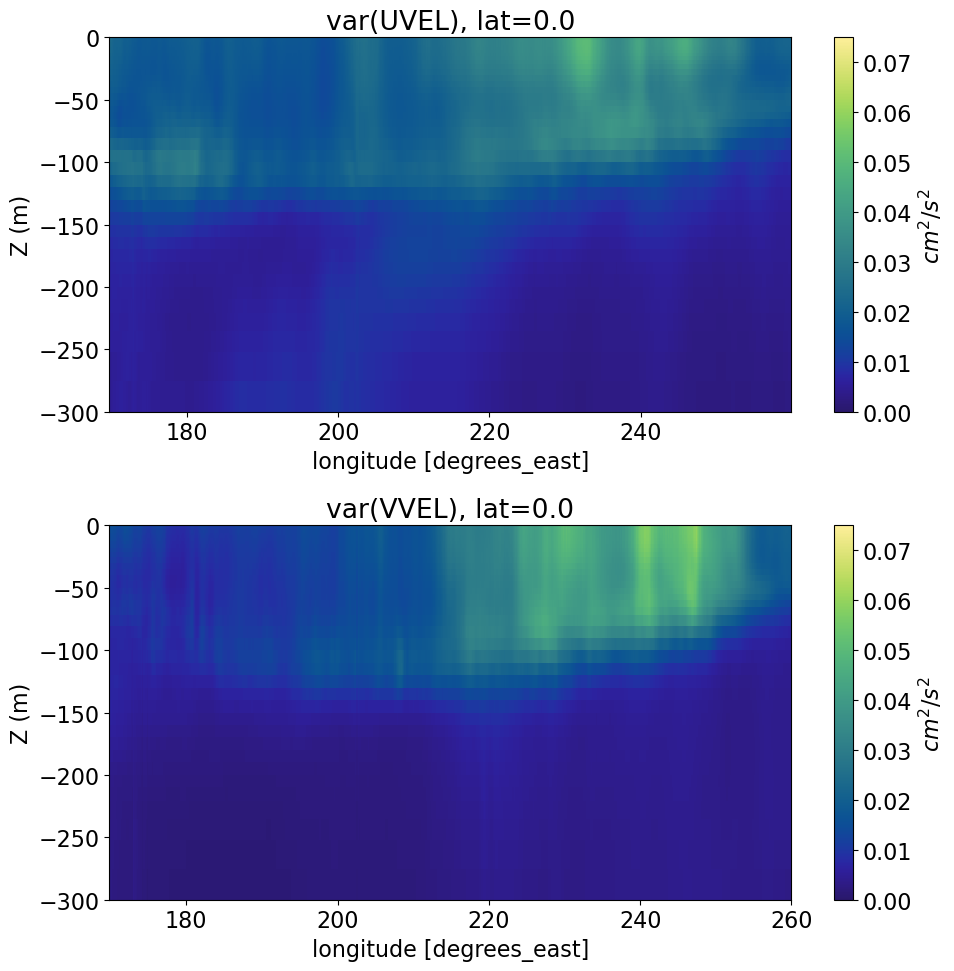

In [18]:
zMin = -300.0
depthui = np.argmin(np.abs(depths - zMin)) + 1

fig, ax = plt.subplots(figsize=(10,10),nrows=2)
u_var_transect[:depthui].plot(ax=ax[0], cmap=cmo.haline, vmin=0.0, vmax=0.075,cbar_kwargs={'label': '$cm^2/s^2$'})
ax[0].set_title('var(UVEL), lat=0.0')
ax[0].set_ylabel('Z (m)')
v_var_transect[:depthui].plot(ax=ax[1], cmap=cmo.haline, vmin=0.0, vmax=0.075,cbar_kwargs={'label': '$cm^2/s^2$'})
ax[1].set_title('var(VVEL), lat=0.0')
ax[1].set_ylabel('Z (m)')
plt.tight_layout()

In [19]:
latMin = -1.9
latMax = 2.1
latli = np.argmin(np.abs(lats - latMin))
latui = np.argmin(np.abs(lats - latMax)) + 1
zMin = -300.0
depthui = np.argmin(np.abs(depths - zMin)) + 1
u_var = ds.UVEL[:,:depthui, latli:latui, lonli:lonui].var(dim='time')
v_var = ds.VVEL[:,:depthui, latli:latui, lonli:lonui].var(dim='time')
u_var_transect = u_var.mean(dim='YC').compute()
v_var_transect = v_var.mean(dim='YG').compute()

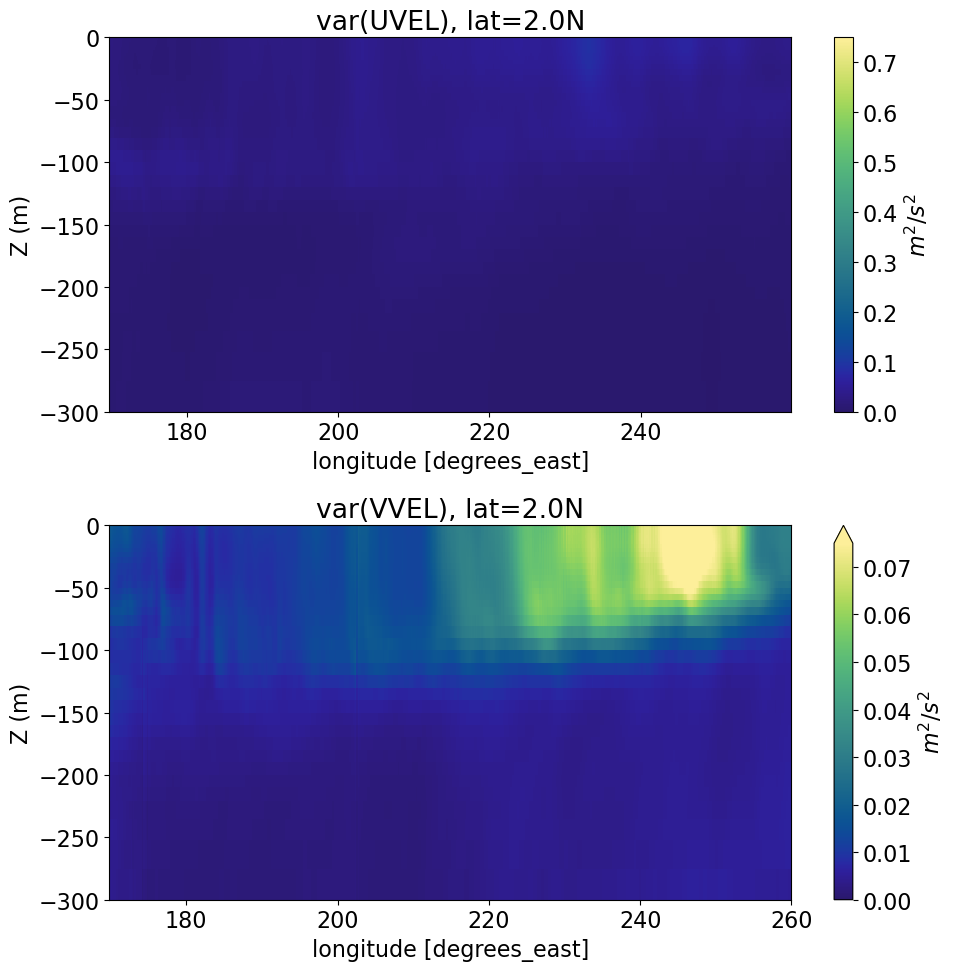

In [20]:
fig, ax = plt.subplots(figsize=(10,10),nrows=2)
u_var_transect.plot(ax=ax[0], cmap=cmo.haline, vmin=0.0, vmax=0.75,cbar_kwargs={'label': '$m^2/s^2$'})
ax[0].set_title('var(UVEL), lat=2.0N')
ax[0].set_ylabel('Z (m)')
v_var_transect.plot(ax=ax[1], cmap=cmo.haline, vmin=0.0, vmax=0.075,cbar_kwargs={'label': '$m^2/s^2$'})
ax[1].set_title('var(VVEL), lat=2.0N')
ax[1].set_ylabel('Z (m)')
plt.tight_layout()

In [22]:
latMin = -4.9
latMax = 5.1
latli = np.argmin(np.abs(lats - latMin))
latui = np.argmin(np.abs(lats - latMax)) + 1
zMin = -300.0
depthui = np.argmin(np.abs(depths - zMin)) + 1
u_var = ds.UVEL[:,:depthui, latli:latui, lonli:lonui].var(dim='time')
v_var = ds.VVEL[:,:depthui, latli:latui, lonli:lonui].var(dim='time')
u_var_transect = u_var.mean(dim='YC').compute()
v_var_transect = v_var.mean(dim='YG').compute()

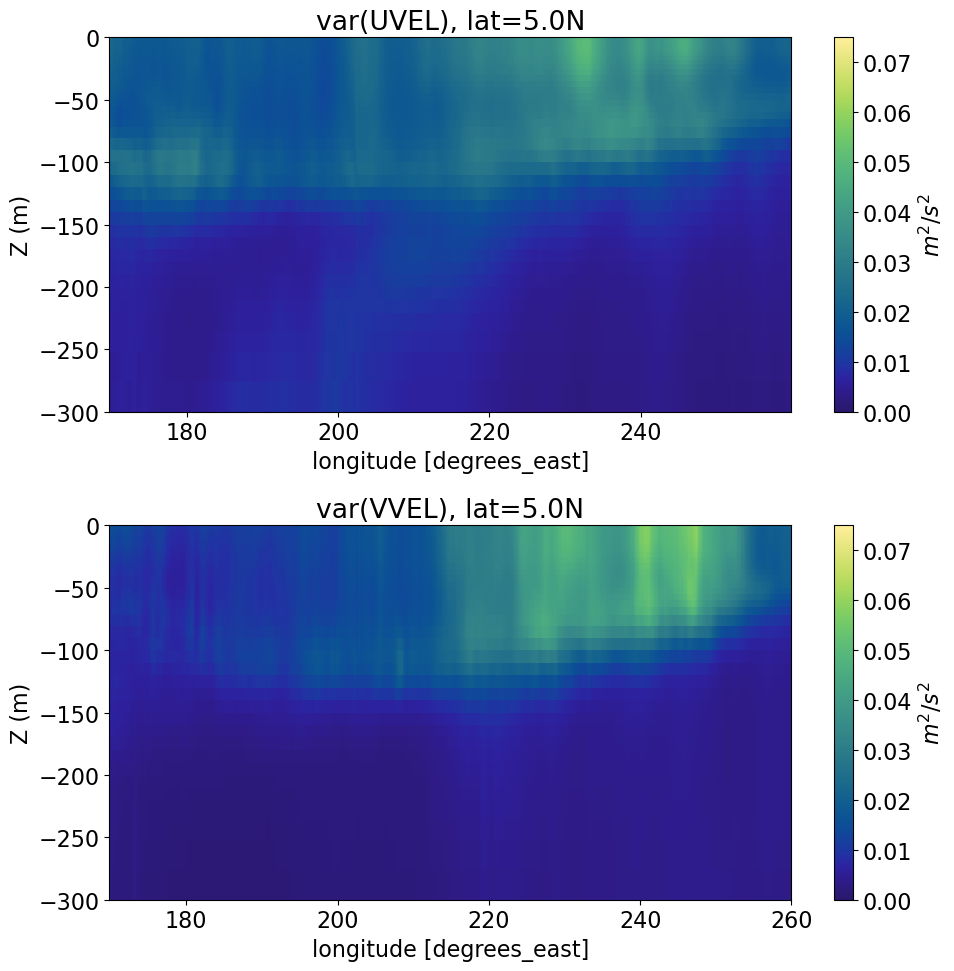

In [23]:
fig, ax = plt.subplots(figsize=(10,10),nrows=2)
u_var_transect.plot(ax=ax[0], cmap=cmo.haline, vmin=0.0, vmax=0.075,cbar_kwargs={'label': '$m^2/s^2$'})
ax[0].set_title('var(UVEL), lat=5.0N')
ax[0].set_ylabel('Z (m)')
v_var_transect.plot(ax=ax[1], cmap=cmo.haline, vmin=0.0, vmax=0.075,cbar_kwargs={'label': '$m^2/s^2$'})
ax[1].set_title('var(VVEL), lat=5.0N')
ax[1].set_ylabel('Z (m)')
plt.tight_layout()

In [ ]:
# import xarray as xr
# W_from_div_uv = xr.DataArray(data=np.array(w_from_div_uv[:,:,:,:]),
#                        dims=['z','lat','lon','time'], 
#                        coords=dict(
#                         z=cropZ,
#                         lat=cropLat,
#                         lon=cropLon,
#                         time=range(0,N,1),
#                     ),
#                     attrs=dict(
#                         description='W from horiz divergence',
#                         units='m/s',
#                     ),
# )
# W_from_div_uv.name = 'W_from_div_uv'
# u_var = ds.UVEL.var(dim='time')
# v_var = ds.VVEL.var(dim='time')

# data = xr.Dataset({'UVAR':u_var,'VVAR':v_var})
# data.to_netcdf('/data/SO3/edavenport/velocity_var_tp6_2012.nc',mode='w')

In [ ]:
# regridded = grid.transform(
#     xds.TEMP,
#     axis="Z",
#     target=np.arange(25, 30, 0.5),
#     target_data=xds.rho - 1000,
#     method="linear",
# )

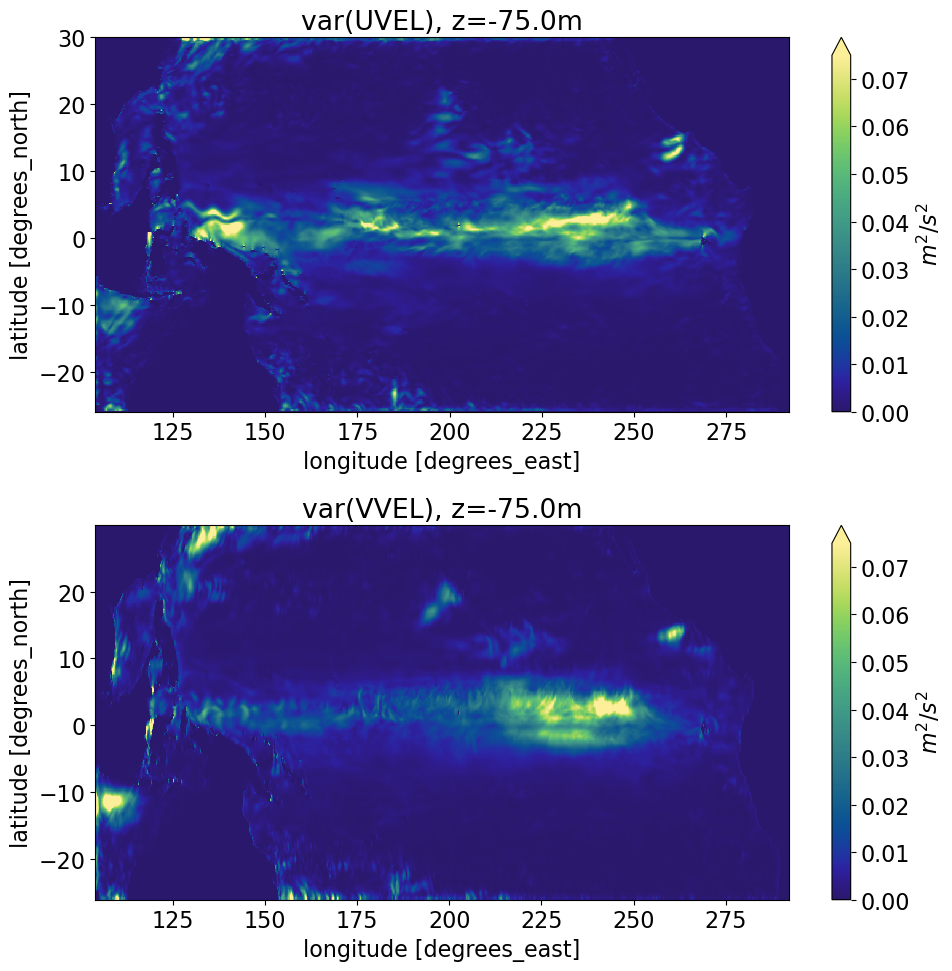

In [25]:

zMin = -75.0
depthui = np.argmin(np.abs(depths - zMin))
u_var = ds.UVEL[:,depthui].var(dim='time')
v_var = ds.VVEL[:,depthui].var(dim='time')
u_var_transect = u_var.compute()
v_var_transect = v_var.compute()

fig, ax = plt.subplots(figsize=(10,10),nrows=2)
u_var_transect.plot(ax=ax[0], cmap=cmo.haline, vmin=0.0, vmax=0.075,cbar_kwargs={'label': '$m^2/s^2$'})
ax[0].set_title('var(UVEL), z=-75.0m')
v_var_transect.plot(ax=ax[1], cmap=cmo.haline, vmin=0.0, vmax=0.075,cbar_kwargs={'label': '$m^2/s^2$'})
ax[1].set_title('var(VVEL), z=-75.0m')
plt.tight_layout()

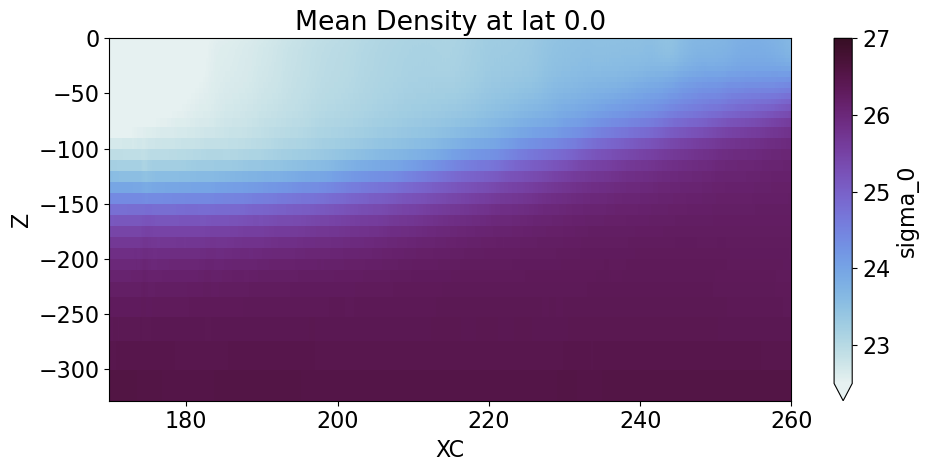

In [4]:
# plot density 
from fastjmd95 import rho

lonMin = 170.0
lonMax = 260.0
latMin = -0.1
latMax = 0.1

latli = np.argmin(np.abs(lats - latMin))
latui = np.argmin(np.abs(lats - latMax)) + 1
lonli = np.argmin(np.abs(lons - lonMin))
lonui = np.argmin(np.abs(lons - lonMax)) + 1
zMin = -350.0
depthui = np.argmin(np.abs(depths - zMin))

ds['sigma_0'] = (rho(ds.SALT, ds.THETA, 0)-1000)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ds.sigma_0[:,:depthui,latli:latui,lonli:lonui].mean(dim='YC').mean(dim='time').plot(ax=ax,vmin=22.5,vmax=27.0,cmap=cmo.dense)
ax.set_title('Mean Density at lat 0.0')
plt.tight_layout()

In [5]:
from xgcm import Grid
# create grid
grid_sigma = Grid(ds, coords={'X': {'center': 'XC', 'left': 'XG'},
                               'Y': {'center': 'YC', 'left': 'YG'},
                               'Z': {'center': 'Z', 'left': 'Zl'}},
                  periodic=['X'])
grid_sigma

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   XC --> left
  * left     XG --> center
Y Axis (not periodic, boundary=None):
  * center   YC --> left
  * left     YG --> center
Z Axis (not periodic, boundary=None):
  * center   Z --> left
  * left     Zl --> center

In [6]:
zMin = -350.0
depthui = np.argmin(np.abs(depths - zMin))
# create grid
target_values = np.arange(22, 27.5, 0.1)

sigma_0_interp = grid_sigma.interp(ds.sigma_0, 'X', boundary='fill')
UVEL_sigma = grid_sigma.transform(ds.UVEL, axis='Z', target=target_values, target_data=sigma_0_interp, method='linear').transpose('time','sigma_0','YC','XG')
sigma_0_interp = grid_sigma.interp(ds.sigma_0, 'Y', boundary='fill')
VVEL_sigma = grid_sigma.transform(ds.VVEL, axis='Z', target=target_values, target_data=sigma_0_interp, method='linear').transpose('time','sigma_0','YG','XC')

# First create an xgcm grid object
# grid = Grid(ds, coords={'Z': {'center':'z'}}, periodic=False)

# define the target values in density, linearly spaced
# theta_target = np.linspace(0, 3, 20)

# and transform
# phi_transformed = grid.transform(ds.phi, 'Z', theta_target, target_data=ds.theta)
# phi_transformed

/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(
/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To 

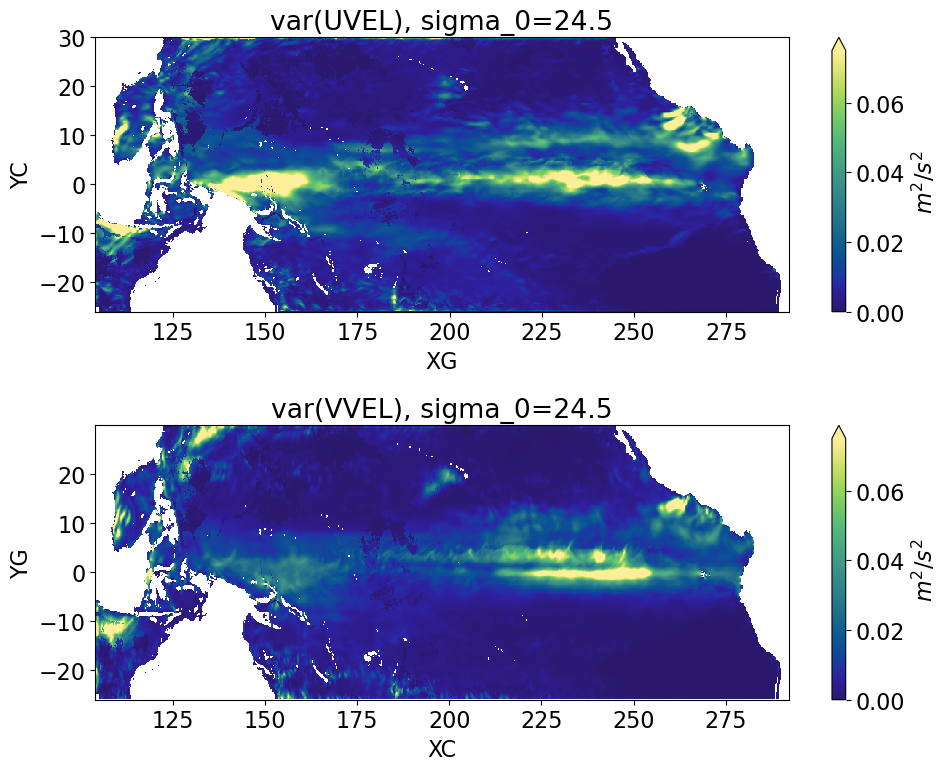

In [31]:
sigmaMin = 24.5
depthui = np.argmin(np.abs(target_values - sigmaMin))
u_var = UVEL_sigma[:,depthui].var(dim='time')
v_var = VVEL_sigma[:,depthui].var(dim='time')
u_var_transect = u_var.compute()
v_var_transect = v_var.compute()

fig, ax = plt.subplots(figsize=(10,8),nrows=2)
u_var_transect.plot(ax=ax[0], cmap=cmo.haline, vmin=0.0, vmax=0.075,cbar_kwargs={'label': '$m^2/s^2$'})
ax[0].set_title('var(UVEL), sigma_0=24.5')
v_var_transect.plot(ax=ax[1], cmap=cmo.haline, vmin=0.0, vmax=0.075,cbar_kwargs={'label': '$m^2/s^2$'})
ax[1].set_title('var(VVEL), sigma_0=24.5')
plt.tight_layout()

5


/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


25


/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


54


/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


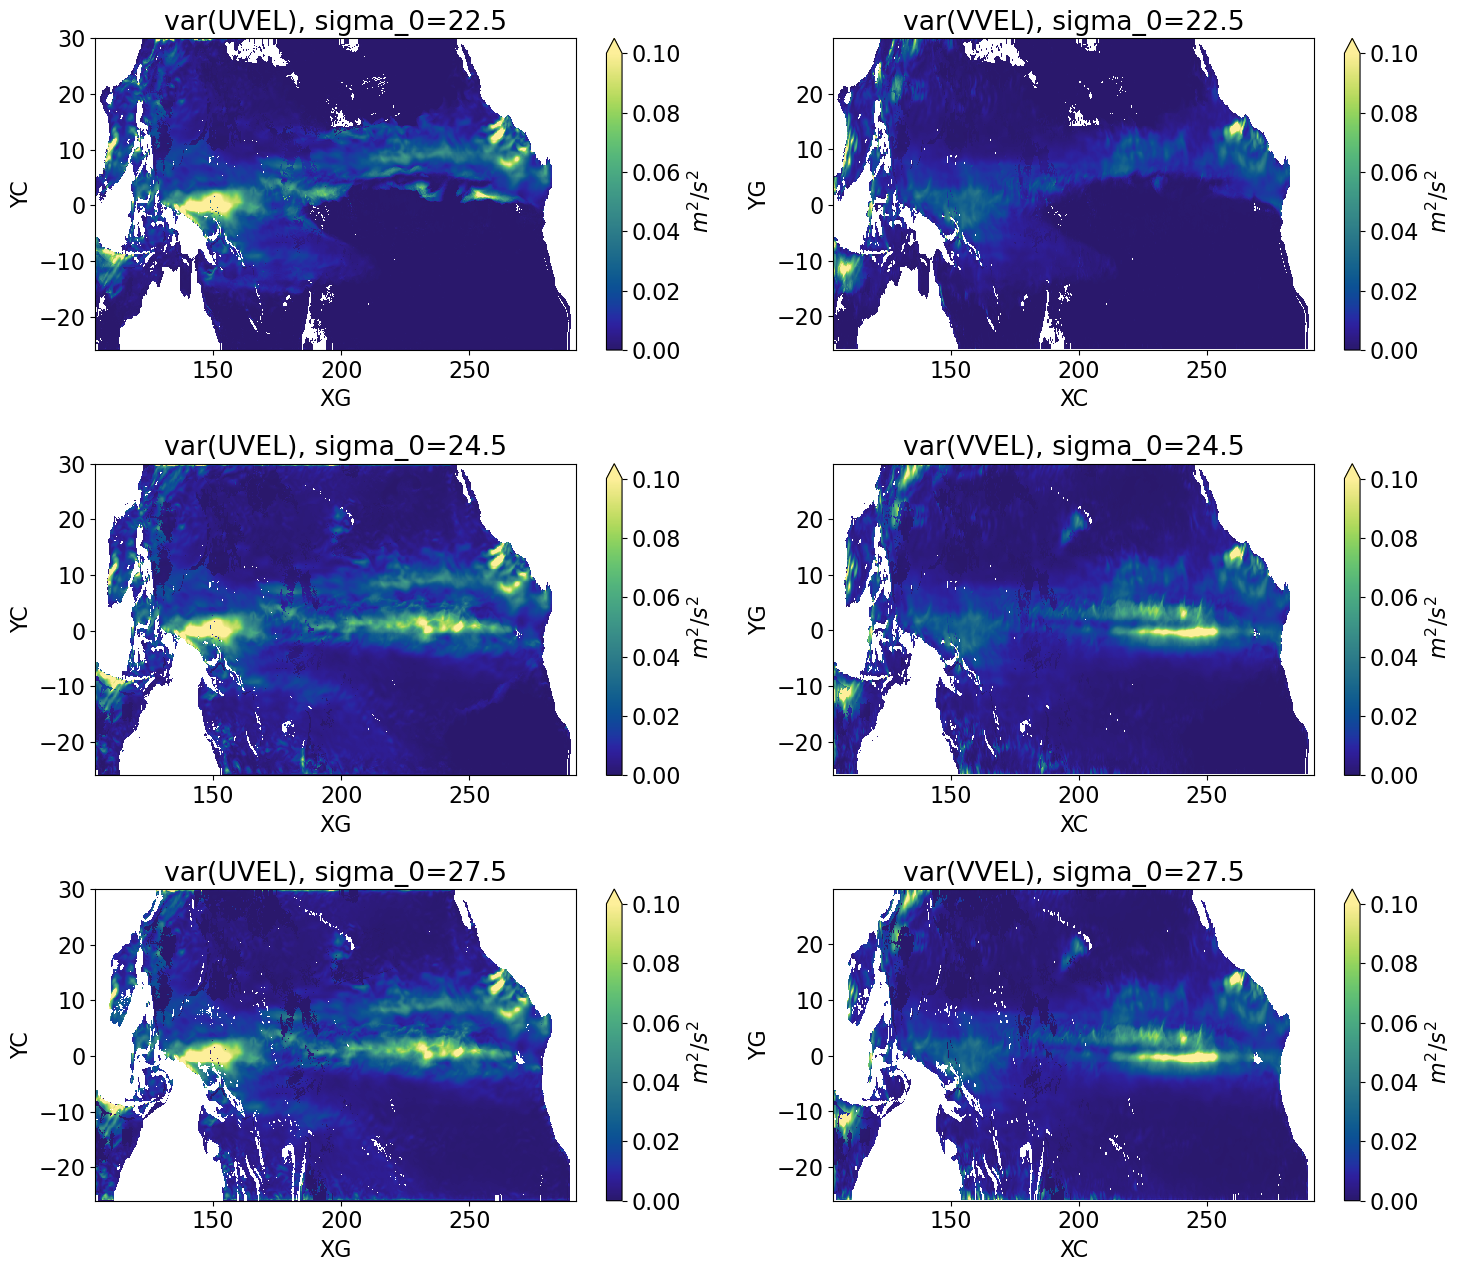

In [7]:
sigmaMin = 22.5
depthui = np.argmin(np.abs(target_values - sigmaMin))
print(depthui)
u_var = UVEL_sigma[:,depthui].var(dim='time')
v_var = VVEL_sigma[:,depthui].var(dim='time')
u_var_transect = u_var.compute()
v_var_transect = v_var.compute()

fig, ax = plt.subplots(figsize=(15,13),nrows=3,ncols=2)
u_var_transect.plot(ax=ax[0,0], cmap=cmo.haline, vmin=0.0, vmax=0.1,cbar_kwargs={'label': '$m^2/s^2$'})
ax[0,0].set_title('var(UVEL), sigma_0=22.5')
v_var_transect.plot(ax=ax[0,1], cmap=cmo.haline, vmin=0.0, vmax=0.1,cbar_kwargs={'label': '$m^2/s^2$'})
ax[0,1].set_title('var(VVEL), sigma_0=22.5')

sigmaMin = 24.5
depthui = np.argmin(np.abs(target_values - sigmaMin))
print(depthui)
u_var = UVEL_sigma[:,depthui].var(dim='time')
v_var = VVEL_sigma[:,depthui].var(dim='time')
u_var_transect = u_var.compute()
v_var_transect = v_var.compute()
u_var_transect.plot(ax=ax[1,0], cmap=cmo.haline, vmin=0.0, vmax=0.1,cbar_kwargs={'label': '$m^2/s^2$'})
ax[1,0].set_title('var(UVEL), sigma_0=24.5')
v_var_transect.plot(ax=ax[1,1], cmap=cmo.haline, vmin=0.0, vmax=0.1,cbar_kwargs={'label': '$m^2/s^2$'})
ax[1,1].set_title('var(VVEL), sigma_0=24.5')

sigmaMin = 27.5
depthui = np.argmin(np.abs(target_values - sigmaMin))
print(depthui)
u_var = UVEL_sigma[:,depthui].var(dim='time')
v_var = VVEL_sigma[:,depthui].var(dim='time')
u_var_transect = u_var.compute()
v_var_transect = v_var.compute()
u_var_transect.plot(ax=ax[2,0], cmap=cmo.haline, vmin=0.0, vmax=0.1,cbar_kwargs={'label': '$m^2/s^2$'})
ax[2,0].set_title('var(UVEL), sigma_0=27.5')
v_var_transect.plot(ax=ax[2,1], cmap=cmo.haline, vmin=0.0, vmax=0.1,cbar_kwargs={'label': '$m^2/s^2$'})
ax[2,1].set_title('var(VVEL), sigma_0=27.5')

plt.tight_layout()

In [42]:
sigmaMin = 22.25
depthui = np.argmin(np.abs(target_values - sigmaMin))
print(depthui)

sigmaMin = 25.25
depthui = np.argmin(np.abs(target_values - sigmaMin))
print(depthui)

sigmaMin = 27.5
depthui = np.argmin(np.abs(target_values - sigmaMin))
print(depthui)

2
32
54


In [2]:
client.shutdown()